In [ ]:
#Reading in the data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/census1990-mld/USCensus1990.data.txt

--2020-12-14 15:17:46--  https://archive.ics.uci.edu/ml/machine-learning-databases/census1990-mld/USCensus1990.data.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 361344227 (345M) [application/x-httpd-php]
Saving to: ‘USCensus1990.data.txt.1’

USCensus1990.data.t 100%[===================>] 344.60M  55.0MB/s    in 6.6s    

2020-12-14 15:17:53 (51.8 MB/s) - ‘USCensus1990.data.txt.1’ saved [361344227/361344227]



In [ ]:
!ls

sample_data		       USCensus1990.data.txt
spark-2.4.7-bin-hadoop2.7      USCensus1990.data.txt.1
spark-2.4.7-bin-hadoop2.7.tgz


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('USCensus').getOrCreate()

In [ ]:
df = spark.read.csv('USCensus1990.data.txt', header=True, inferSchema=False)

In [ ]:
df.show(3)

+------+----+---------+---------+------+--------+------+-------+--------+--------+--------+------+-------+---------+-------+------+-------+--------+--------+--------+--------+--------+--------+--------+--------+---------+-------+------+--------+--------+---------+------+---------+---------+---------+------+---------+---------+----+--------+------+---------+---------+-------+-------+---------+-------+-------+---------+---------+-----+---------+--------+---------+-------+-------+----+--------+--------+---------+---------+--------+-------+-------+--------+-----+--------+--------+--------+
|caseid|dAge|dAncstry1|dAncstry2|iAvail|iCitizen|iClass|dDepart|iDisabl1|iDisabl2|iEnglish|iFeb55|iFertil|dHispanic|dHour89|dHours|iImmigr|dIncome1|dIncome2|dIncome3|dIncome4|dIncome5|dIncome6|dIncome7|dIncome8|dIndustry|iKorean|iLang1|iLooking|iMarital|iMay75880|iMeans|iMilitary|iMobility|iMobillim|dOccup|iOthrserv|iPerscare|dPOB|dPoverty|dPwgt1|iRagechld|dRearning|iRelat1|iRelat2|iRemplpar|iRiders|iRla

In [ ]:
df.count()

2458285

In [ ]:
#df.describe().show()

#Choosing Variables Relevant to Policy/Law Making


---


In [ ]:
df_cluster = df.select('iCitizen', 'iClass', 'iDisabl1', 'iEnglish', 'iFertil', 'dAge', 'iLang1', 'iMarital', 'iMeans', 'iMilitary', 'dPOB', 'dPoverty', 'dPwgt1', 'dRearning', 'iSex', 'iTmpabsnt', 'dTravtime', 'iWork89', 'iYearsch')

In [ ]:
df_cluster.show(5)

+--------+------+--------+--------+-------+----+------+--------+------+---------+----+--------+------+---------+----+---------+---------+-------+--------+
|iCitizen|iClass|iDisabl1|iEnglish|iFertil|dAge|iLang1|iMarital|iMeans|iMilitary|dPOB|dPoverty|dPwgt1|dRearning|iSex|iTmpabsnt|dTravtime|iWork89|iYearsch|
+--------+------+--------+--------+-------+----+------+--------+------+---------+----+--------+------+---------+----+---------+---------+-------+--------+
|       0|     5|       2|       1|      1|   5|     1|       1|     1|        4|   0|       2|     1|        3|   1|        0|        5|      1|      11|
|       0|     7|       2|       0|      3|   6|     2|       0|     1|        4|   0|       2|     2|        2|   1|        0|        1|      1|       5|
|       0|     7|       2|       0|      1|   3|     2|       4|    10|        4|   0|       2|     1|        2|   1|        0|        2|      1|      10|
|       0|     1|       2|       0|      3|   4|     2|       2|     1

In [ ]:
type(df_cluster)

pyspark.sql.dataframe.DataFrame

#One hot encoding to make variables suitable for clustering

In [ ]:
#Checking the data types of each column - need to be int
df_cluster.dtypes

[('iCitizen', 'string'),
 ('iClass', 'string'),
 ('iDisabl1', 'string'),
 ('iEnglish', 'string'),
 ('iFertil', 'string'),
 ('dAge', 'string'),
 ('iLang1', 'string'),
 ('iMarital', 'string'),
 ('iMeans', 'string'),
 ('iMilitary', 'string'),
 ('dPOB', 'string'),
 ('dPoverty', 'string'),
 ('dPwgt1', 'string'),
 ('dRearning', 'string'),
 ('iSex', 'string'),
 ('iTmpabsnt', 'string'),
 ('dTravtime', 'string'),
 ('iWork89', 'string'),
 ('iYearsch', 'string')]

In [ ]:
#Changing the data types to int
df_cluster = df_cluster.withColumn("iCitizen", df_cluster["iCitizen"].cast('int'))
df_cluster = df_cluster.withColumn("iClass", df_cluster["iClass"].cast('int'))
df_cluster = df_cluster.withColumn("iDisabl1", df_cluster["iDisabl1"].cast('int'))
df_cluster = df_cluster.withColumn("iEnglish", df_cluster["iEnglish"].cast('int'))
df_cluster = df_cluster.withColumn("iFertil", df_cluster["iFertil"].cast('int'))
df_cluster = df_cluster.withColumn("dAge", df_cluster["dAge"].cast('int'))
df_cluster = df_cluster.withColumn("iLang1", df_cluster["iLang1"].cast('int'))
df_cluster = df_cluster.withColumn("iMarital", df_cluster["iMarital"].cast('int'))
df_cluster = df_cluster.withColumn("iMeans", df_cluster["iMeans"].cast('int'))
df_cluster = df_cluster.withColumn("iMilitary", df_cluster["iMilitary"].cast('int'))
df_cluster = df_cluster.withColumn("dPOB", df_cluster["dPOB"].cast('int'))
df_cluster = df_cluster.withColumn("dPoverty", df_cluster["dPoverty"].cast('int'))
df_cluster = df_cluster.withColumn("dPwgt1", df_cluster["dPwgt1"].cast('int'))
df_cluster = df_cluster.withColumn("dRearning", df_cluster["dRearning"].cast('int'))
df_cluster = df_cluster.withColumn("iSex", df_cluster["iSex"].cast('int'))
df_cluster = df_cluster.withColumn("iTmpabsnt", df_cluster["iTmpabsnt"].cast('int'))
df_cluster = df_cluster.withColumn("dTravtime", df_cluster["dTravtime"].cast('int'))
df_cluster = df_cluster.withColumn("iWork89", df_cluster["iWork89"].cast('int'))
df_cluster = df_cluster.withColumn("iYearsch", df_cluster["iYearsch"].cast('int'))

In [ ]:
df_cluster.dtypes

[('iCitizen', 'int'),
 ('iClass', 'int'),
 ('iDisabl1', 'int'),
 ('iEnglish', 'int'),
 ('iFertil', 'int'),
 ('dAge', 'int'),
 ('iLang1', 'int'),
 ('iMarital', 'int'),
 ('iMeans', 'int'),
 ('iMilitary', 'int'),
 ('dPOB', 'int'),
 ('dPoverty', 'int'),
 ('dPwgt1', 'int'),
 ('dRearning', 'int'),
 ('iSex', 'int'),
 ('iTmpabsnt', 'int'),
 ('dTravtime', 'int'),
 ('iWork89', 'int'),
 ('iYearsch', 'int')]

In [ ]:
from pyspark.ml.feature import OneHotEncoderEstimator
encoder = OneHotEncoderEstimator(inputCols=['iCitizen'], outputCols=['Citizen Status'], dropLast=False)
df_cluster = encoder.fit(df_cluster).transform(df_cluster)

In [ ]:
df_cluster.show(3)

+--------+------+--------+--------+-------+----+------+--------+------+---------+----+--------+------+---------+----+---------+---------+-------+--------+--------------+
|iCitizen|iClass|iDisabl1|iEnglish|iFertil|dAge|iLang1|iMarital|iMeans|iMilitary|dPOB|dPoverty|dPwgt1|dRearning|iSex|iTmpabsnt|dTravtime|iWork89|iYearsch|Citizen Status|
+--------+------+--------+--------+-------+----+------+--------+------+---------+----+--------+------+---------+----+---------+---------+-------+--------+--------------+
|       0|     5|       2|       1|      1|   5|     1|       1|     1|        4|   0|       2|     1|        3|   1|        0|        5|      1|      11| (5,[0],[1.0])|
|       0|     7|       2|       0|      3|   6|     2|       0|     1|        4|   0|       2|     2|        2|   1|        0|        1|      1|       5| (5,[0],[1.0])|
|       0|     7|       2|       0|      1|   3|     2|       4|    10|        4|   0|       2|     1|        2|   1|        0|        2|      1|     

In [ ]:
from pyspark.ml.feature import OneHotEncoderEstimator
encoder = OneHotEncoderEstimator(inputCols=['iClass'], outputCols=['Worker_class'])
df_cluster = encoder.fit(df_cluster).transform(df_cluster)

In [ ]:
from pyspark.ml.feature import OneHotEncoderEstimator
encoder = OneHotEncoderEstimator(inputCols=['iDisabl1'], outputCols=['Work_Disability_Limitation'])
df_cluster = encoder.fit(df_cluster).transform(df_cluster)

In [ ]:
from pyspark.ml.feature import OneHotEncoderEstimator
encoder = OneHotEncoderEstimator(inputCols=['iEnglish'], outputCols=['English_proficiency'])
df_cluster = encoder.fit(df_cluster).transform(df_cluster)

In [ ]:
from pyspark.ml.feature import OneHotEncoderEstimator
encoder = OneHotEncoderEstimator(inputCols=['iFertil'], outputCols=['Number_of_children'])
df_cluster = encoder.fit(df_cluster).transform(df_cluster)

In [ ]:
from pyspark.ml.feature import OneHotEncoderEstimator
encoder = OneHotEncoderEstimator(inputCols=['dAge'], outputCols=['Age'])
df_cluster = encoder.fit(df_cluster).transform(df_cluster)

In [ ]:
from pyspark.ml.feature import OneHotEncoderEstimator
encoder = OneHotEncoderEstimator(inputCols=['iLang1'], outputCols=['Other_languages'])
df_cluster = encoder.fit(df_cluster).transform(df_cluster)

In [ ]:
from pyspark.ml.feature import OneHotEncoderEstimator
encoder = OneHotEncoderEstimator(inputCols=['iMarital'], outputCols=['Marital_status'])
df_cluster = encoder.fit(df_cluster).transform(df_cluster)

In [ ]:
from pyspark.ml.feature import OneHotEncoderEstimator
encoder = OneHotEncoderEstimator(inputCols=['iMeans'], outputCols=['Means_of_Transporation'])
df_cluster = encoder.fit(df_cluster).transform(df_cluster)

In [ ]:
from pyspark.ml.feature import OneHotEncoderEstimator
encoder = OneHotEncoderEstimator(inputCols=['iMilitary'], outputCols=['Military_status'])
df_cluster = encoder.fit(df_cluster).transform(df_cluster)

In [ ]:
from pyspark.ml.feature import OneHotEncoderEstimator
encoder = OneHotEncoderEstimator(inputCols=['dPOB'], outputCols=['Place_of_Birth'])
df_cluster = encoder.fit(df_cluster).transform(df_cluster)

In [ ]:
from pyspark.ml.feature import OneHotEncoderEstimator
encoder = OneHotEncoderEstimator(inputCols=['dPoverty'], outputCols=['Poverty_status'])
df_cluster = encoder.fit(df_cluster).transform(df_cluster)

In [ ]:
from pyspark.ml.feature import OneHotEncoderEstimator
encoder = OneHotEncoderEstimator(inputCols=['dPwgt1'], outputCols=['Weight'])
df_cluster = encoder.fit(df_cluster).transform(df_cluster)

In [ ]:
from pyspark.ml.feature import OneHotEncoderEstimator
encoder = OneHotEncoderEstimator(inputCols=['dRearning'], outputCols=['Personal_Income'])
df_cluster = encoder.fit(df_cluster).transform(df_cluster)

In [ ]:
from pyspark.ml.feature import OneHotEncoderEstimator
encoder = OneHotEncoderEstimator(inputCols=['iSex'], outputCols=['Sex'])
df_cluster = encoder.fit(df_cluster).transform(df_cluster)

In [ ]:
from pyspark.ml.feature import OneHotEncoderEstimator
encoder = OneHotEncoderEstimator(inputCols=['iTmpabsnt'], outputCols=['Temp_Absent_Work'])
df_cluster = encoder.fit(df_cluster).transform(df_cluster)

In [ ]:
from pyspark.ml.feature import OneHotEncoderEstimator
encoder = OneHotEncoderEstimator(inputCols=['dTravtime'], outputCols=['Travel_time'])
df_cluster = encoder.fit(df_cluster).transform(df_cluster)

In [ ]:
from pyspark.ml.feature import OneHotEncoderEstimator
encoder = OneHotEncoderEstimator(inputCols=['iWork89'], outputCols=['Worked_last_year'])
df_cluster = encoder.fit(df_cluster).transform(df_cluster)

In [ ]:
from pyspark.ml.feature import OneHotEncoderEstimator
encoder = OneHotEncoderEstimator(inputCols=['iYearsch'], outputCols=['Educational_background'])
df_cluster = encoder.fit(df_cluster).transform(df_cluster)

In [ ]:
df_cluster.show(3)

+--------+------+--------+--------+-------+----+------+--------+------+---------+----+--------+------+---------+----+---------+---------+-------+--------+--------------+-------------+--------------------------+-------------------+------------------+-------------+---------------+--------------+----------------------+---------------+--------------+--------------+-------------+---------------+---------+----------------+-------------+----------------+----------------------+
|iCitizen|iClass|iDisabl1|iEnglish|iFertil|dAge|iLang1|iMarital|iMeans|iMilitary|dPOB|dPoverty|dPwgt1|dRearning|iSex|iTmpabsnt|dTravtime|iWork89|iYearsch|Citizen Status| Worker_class|Work_Disability_Limitation|English_proficiency|Number_of_children|          Age|Other_languages|Marital_status|Means_of_Transporation|Military_status|Place_of_Birth|Poverty_status|       Weight|Personal_Income|      Sex|Temp_Absent_Work|  Travel_time|Worked_last_year|Educational_background|
+--------+------+--------+--------+-------+----+--

#Buidling the Clustering Algorithms

In [ ]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=df_cluster.columns[20:],outputCol="features")
df_cluster = assembler.transform(df_cluster)
df_cluster.show(5)

In [ ]:
#Kmeans
from pyspark.ml.clustering import KMeans
kmeans = KMeans(k=5)
km_model = kmeans.fit(df_cluster)

In [ ]:
predicted = km_model.transform(df_cluster)
predicted.show(3)

+--------+------+--------+--------+-------+----+------+--------+------+---------+----+--------+------+---------+----+---------+---------+-------+--------+--------------+-------------+--------------------------+-------------------+------------------+-------------+---------------+--------------+----------------------+---------------+--------------+--------------+-------------+---------------+---------+----------------+-------------+----------------+----------------------+--------------------+----------+
|iCitizen|iClass|iDisabl1|iEnglish|iFertil|dAge|iLang1|iMarital|iMeans|iMilitary|dPOB|dPoverty|dPwgt1|dRearning|iSex|iTmpabsnt|dTravtime|iWork89|iYearsch|Citizen Status| Worker_class|Work_Disability_Limitation|English_proficiency|Number_of_children|          Age|Other_languages|Marital_status|Means_of_Transporation|Military_status|Place_of_Birth|Poverty_status|       Weight|Personal_Income|      Sex|Temp_Absent_Work|  Travel_time|Worked_last_year|Educational_background|            feature

In [ ]:
km_pdf = predicted.select(['iCitizen','iClass','iDisabl1','iEnglish','iFertil','dAge','iLang1','iMarital','iMeans','iMilitary','dPOB','dPoverty','dPwgt1','dRearning','iSex','iTmpabsnt','dTravtime','iWork89','iYearsch','prediction'])

In [ ]:
km_pdf.show(3)

+--------+------+--------+--------+-------+----+------+--------+------+---------+----+--------+------+---------+----+---------+---------+-------+--------+----------+
|iCitizen|iClass|iDisabl1|iEnglish|iFertil|dAge|iLang1|iMarital|iMeans|iMilitary|dPOB|dPoverty|dPwgt1|dRearning|iSex|iTmpabsnt|dTravtime|iWork89|iYearsch|prediction|
+--------+------+--------+--------+-------+----+------+--------+------+---------+----+--------+------+---------+----+---------+---------+-------+--------+----------+
|       0|     5|       2|       1|      1|   5|     1|       1|     1|        4|   0|       2|     1|        3|   1|        0|        5|      1|      11|         4|
|       0|     7|       2|       0|      3|   6|     2|       0|     1|        4|   0|       2|     2|        2|   1|        0|        1|      1|       5|         4|
|       0|     7|       2|       0|      1|   3|     2|       4|    10|        4|   0|       2|     1|        2|   1|        0|        2|      1|      10|         4|
+---

In [ ]:
import pandas as pd
km_pdf = km_pdf.toPandas()
km_pdf.head()

,iCitizen,iClass,iDisabl1,iEnglish,iFertil,dAge,iLang1,iMarital,iMeans,iMilitary,dPOB,dPoverty,dPwgt1,dRearning,iSex,iTmpabsnt,dTravtime,iWork89,iYearsch,prediction
0,0,5,2,1,1,5,1,1,1,4,0,2,1,3,1,0,5,1,11,4
1,0,7,2,0,3,6,2,0,1,4,0,2,2,2,1,0,1,1,5,4
2,0,7,2,0,1,3,2,4,10,4,0,2,1,2,1,0,2,1,10,4
3,0,1,2,0,3,4,2,2,1,4,0,2,1,2,1,0,1,1,10,4
4,0,0,2,0,3,7,2,0,0,4,0,2,1,0,1,3,0,2,5,2


In [ ]:
km_pdf.groupby('prediction').mean()

,iCitizen,iClass,iDisabl1,iEnglish,iFertil,dAge,iLang1,iMarital,iMeans,iMilitary,dPOB,dPoverty,dPwgt1,dRearning,iSex,iTmpabsnt,dTravtime,iWork89,iYearsch
prediction,,,,,,,,,,,,,,,,,,,
0,0.131005,0.000000,0.000000,0.138906,0.028778,1.119947,1.271771,3.998386,0.000000,0.000000,0.138005,1.786332,1.095614,0.000000,0.487858,0.000000,0.000000,0.000000,2.985326
1,0.306247,2.092894,1.866642,0.226392,1.470664,4.259263,1.867071,1.676365,0.885809,3.696622,0.301645,1.742205,1.123104,2.256054,0.529673,2.217584,0.000000,1.000597,9.864808
2,0.365935,0.539719,1.683315,0.284936,2.282567,5.605569,1.848047,1.107139,0.055086,3.721451,0.340714,1.718288,1.094472,0.000657,0.671302,2.593181,0.000930,1.996781,8.692499
3,0.352554,2.162364,1.956531,0.224244,0.000000,4.337167,1.868646,1.183215,1.743269,3.367175,0.347706,1.927095,1.148833,3.104361,0.000000,0.000000,3.435581,1.020954,10.833830
4,0.296595,1.904189,1.969162,0.188257,2.612279,4.289386,1.881561,1.314202,1.651902,3.965038,0.291318,1.921674,1.146474,2.526427,1.000000,0.000000,3.188505,1.032344,10.929245


In [ ]:
km_pdf.groupby(km_pdf.prediction==0).mean()

,iCitizen,iClass,iDisabl1,iEnglish,iFertil,dAge,iLang1,iMarital,iMeans,iMilitary,dPOB,dPoverty,dPwgt1,dRearning,iSex,iTmpabsnt,dTravtime,iWork89,iYearsch,prediction
prediction,,,,,,,,,,,,,,,,,,,,
False,0.336004,1.613049,1.868816,0.232818,1.533089,4.684722,1.865812,1.257462,1.118938,3.668122,0.325134,1.841459,1.129119,1.941415,0.523632,1.036027,1.935973,1.305904,10.112041,2.717033
True,0.131005,0.000000,0.000000,0.138906,0.028778,1.119947,1.271771,3.998386,0.000000,0.000000,0.138005,1.786332,1.095614,0.000000,0.487858,0.000000,0.000000,0.000000,2.985326,0.000000


In [ ]:
cluster_counts = km_pdf.prediction.value_counts()

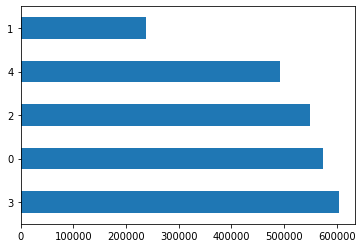

In [ ]:
cluster_counts.plot.barh()

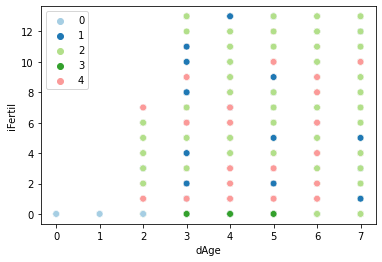

In [ ]:
import seaborn as sns
sns.scatterplot(x="dAge", y="iFertil", hue="prediction", 
                data=km_pdf, palette='Paired', s=60);
plt.legend(loc='upper left');

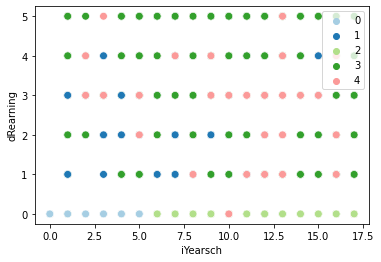

In [ ]:
import seaborn as sns
sns.scatterplot(x="iYearsch", y="dRearning", hue="prediction", 
                data=km_pdf, palette='Paired', s=60);
plt.legend(loc='upper right');

prediction
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
3    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
4    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

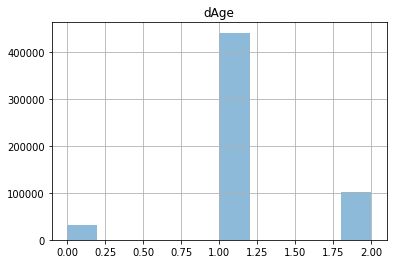

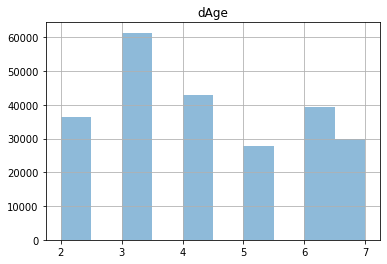

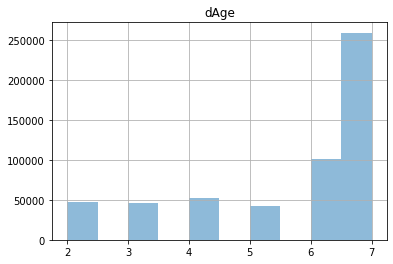

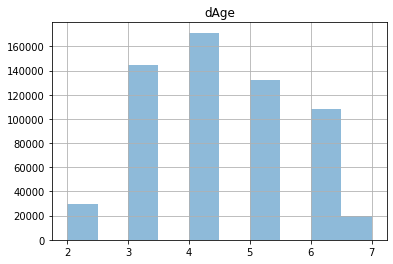

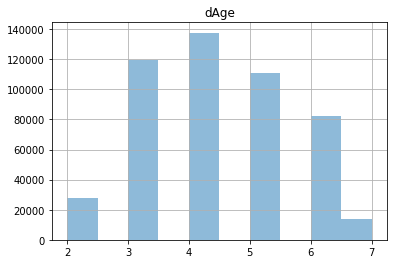

In [ ]:
km_pdf.groupby('prediction').hist(column='dAge',alpha=0.5)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

threedee = plt.figure(figsize=(12,10)).gca(projection='3d')
threedee.scatter(km_pdf.iClass, km_pdf.iFertil, km_pdf.dRearning, c=km_pdf.prediction)
threedee.set_xlabel('Age')
threedee.set_ylabel('# of children')
threedee.set_zlabel('Income')
plt.legend()
plt.show()

No handles with labels found to put in legend.


KeyboardInterrupt: ignored

In [ ]:
km_centers = km_model.clusterCenters()
print(km_centers)

[array([8.91836358e-01, 7.10843921e-02, 6.07776146e-03, 7.31471746e-03,
       4.31017185e-03, 4.04886823e-03, 6.55756126e-03, 1.86033902e-03,
       3.27030833e-03, 5.12346819e-01, 1.54893289e-01, 8.80068777e-01,
       6.48835594e-02, 2.81753071e-02, 1.85240181e-02, 6.58851638e-01,
       8.17041990e-02, 4.80290306e-02, 7.89814688e-02, 5.71594960e-02,
       3.28894739e-02, 1.74600754e-02, 9.70479827e-03, 5.58547616e-03,
       3.55479929e-03, 2.14750544e-03, 1.51520421e-03, 8.72201131e-04,
       2.86889961e-02, 3.93514320e-01, 1.32954488e-01, 4.06081864e-02,
       4.60438366e-02, 3.69704477e-02, 8.99490859e-02, 1.63645622e-01,
       1.19931223e-01, 2.62358635e-01, 9.79745849e-02, 2.79015180e-02,
       9.55675595e-03, 9.99251762e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.48237984e-04, 5.12346819e-01, 3.38892055e-05, 6.65780196e-02,
     

In [ ]:
#cost = error value - how far the datapoint is from the cluster center
km_cost = km_model.computeCost(df_cluster)
print(km_cost)

14254282.768579142


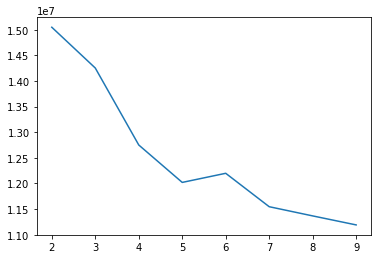

In [ ]:
costs = []
for k in range(2, 10):
  km_model = KMeans(k=k).fit(df_cluster)
  costs.append(km_model.computeCost(df_cluster))

import matplotlib.pyplot as plt
plt.plot(range(2,10), costs)

In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predicted)
print(silhouette)

0.27251840167195557


In [ ]:
silhouettes = []
for k in range(2, 10):
  predicted = KMeans(k=k).fit(df_cluster).transform(df_cluster)
  silhouettes.append(evaluator.evaluate(predicted))

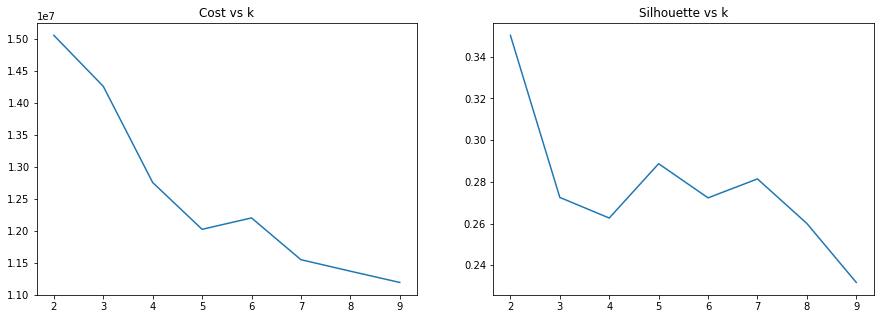

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axes[0].plot(range(2,10), costs)
axes[0].title.set_text('Cost vs k')
axes[1].plot(range(2,10), silhouettes)
axes[1].title.set_text('Silhouette vs k')

In [ ]:
print(silhouettes)

[0.3502695127706758, 0.27251840167195557, 0.26263210590271685, 0.28868758782249515, 0.2723189183952895, 0.2813981948152405, 0.2600252707602308, 0.23173086144558283]


In [ ]:
#Hierarchical Clustering
from pyspark.ml.clustering import BisectingKMeans
bkm = BisectingKMeans().setK(3).setSeed(1)
bkm_model = bkm.fit(df_cluster)

In [ ]:
# Shows the result.
print("Cluster Centers: ")
bkm_centers = bkm_model.clusterCenters()
for center in bkm_centers:
    print(center)

Cluster Centers: 
[0.00000000e+00 6.68208519e-01 8.85130939e-02 8.54757530e-02
 5.41141574e-02 3.21880499e-02 5.21927725e-02 1.38475572e-02
 5.46009730e-03 0.00000000e+00 4.66065237e-02 8.79345759e-01
 7.36579417e-02 2.53807189e-02 1.60535918e-02 0.00000000e+00
 3.36297355e-01 1.62722544e-01 2.42987268e-01 1.41134458e-01
 6.35658188e-02 2.74250207e-02 1.27687998e-02 6.06982973e-03
 3.18128299e-03 1.68687248e-03 8.91147397e-04 5.04606148e-04
 0.00000000e+00 0.00000000e+00 7.21166287e-02 2.47362139e-01
 2.65537664e-01 2.06430817e-01 1.65698427e-01 0.00000000e+00
 1.20654241e-01 5.66609629e-01 4.65596212e-02 1.14314318e-01
 2.78859590e-02 1.84571020e-01 7.05292219e-01 2.69187972e-02
 5.48273988e-04 1.12468947e-02 3.14893645e-03 2.37747128e-04
 1.44750802e-03 2.39364455e-04 1.43295208e-03 3.24743168e-02
 2.75867534e-02 0.00000000e+00 2.67020754e-03 1.15687429e-02
 2.71225805e-03 9.09811355e-01 4.41368647e-03 2.02101232e-02
 2.27137460e-02 3.77856200e-02 1.39575355e-03 1.38038893e-02
 8.090

In [ ]:
# Evaluate clustering.
bkm_cost = bkm_model.computeCost(df_cluster)
print("Within Set Sum of Squared Errors = " + str(bkm_cost))

Within Set Sum of Squared Errors = 14254907.368693331


In [ ]:
 predictions = bkm_model.transform(df_cluster)

In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print(silhouette)

0.27255665727247474
